In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from google.colab import files


In [ ]:
e1 = pd.read_csv("/content/api_data_aadhar_enrolment_0_500000.csv")
e2 = pd.read_csv("/content/api_data_aadhar_enrolment_1000000_1006029.csv")
e3 = pd.read_csv("/content/api_data_aadhar_enrolment_500000_1000000.csv")

In [ ]:
print(e1.shape)
print(e2.shape)
print(e3.shape)

(500000, 7)
(6029, 7)
(500000, 7)


In [ ]:
e1["state"].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA'], dtype=object)

In [ ]:
e2["state"].unique()

array(['Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Pondicherry'], dtype=object)

In [ ]:
e3["state"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'West Bengal',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa',
       'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'Bihar', 'Chandigarh', 'Sikkim', 'West Bangal',
       'Dadra and Nagar Haveli', 'Daman and Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Jammu & Kashmir',
       'andhra pradesh', 'Dadra & Nagar Haveli', 'Westbengal',
       'Daman & Diu', 'WESTBENGAL', 'West bengal', 'West  Bengal',
       'WEST BENGAL', '100000'], dtype=object)

In [ ]:
e1["NewDate"] = pd.to_datetime(e1["date"], format='%d-%m-%Y').dt.strftime("%Y%m%d")
e2["NewDate"] = pd.to_datetime(e2["date"], format='%d-%m-%Y').dt.strftime("%Y%m%d")
e3["NewDate"] = pd.to_datetime(e3["date"], format='%d-%m-%Y').dt.strftime("%Y%m%d")

In [ ]:
print(e1["NewDate"].isnull().sum())
print(e2["NewDate"].isnull().sum())
print(e3["NewDate"].isnull().sum())

0
0
0


In [ ]:
print(e1['NewDate'].max(), e1['NewDate'].max())
print(e2['NewDate'].max(), e2['NewDate'].max())
print(e3['NewDate'].max(), e3['NewDate'].max())

20251026 20251026
20251231 20251231
20251231 20251231


In [ ]:
# Merging Datasets
df = pd.concat([e1, e2, e3], axis = 0, ignore_index= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
 7   NewDate         1006029 non-null  object
dtypes: int64(4), object(4)
memory usage: 61.4+ MB


In [ ]:
print(df.isnull().sum())

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
NewDate           0
dtype: int64


In [ ]:
df["state"].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [ ]:
df["state"].nunique()

55

In [ ]:
def CleanStateNames(i):
  if pd.isna(i):
    return i
  i = str(i).lower()
  i = re.sub(r'[^a-z\s]', ' ', i)
  i = re.sub(r'\s+', ' ', i).strip()
  return i


In [ ]:
state_mapping = {
    # West Bengal
    'west bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'westbengal ': 'West Bengal',

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu & Kashmir',
    'jammu kashmir': 'Jammu & Kashmir',

    # Collapse all Dadra / Daman variants into ONE state
    'dadra nagar haveli': 'Dadra & Nagar Haveli & Daman & Diu',
    'dadra and nagar haveli': 'Dadra & Nagar Haveli & Daman & Diu',
    'daman and diu': 'Dadra & Nagar Haveli & Daman & Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra & Nagar Haveli & Daman & Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra & Nagar Haveli & Daman & Diu',
    'daman diu': 'Dadra & Nagar Haveli & Daman & Diu',


    # Puducherry
    'puducherry': 'Puducherry',


    # Andaman & Nicobar Islands
    'andaman and nicobar islands': 'Andaman & Nicobar Islands',
    'andaman nicobar islands': 'Andaman & Nicobar Islands',

    # Puducherry
    'pondicherry': 'Puducherry',

    # Case-normalized direct matches
    'delhi': 'Delhi',
    'ladakh': 'Ladakh',
    'goa': 'Goa',
    'sikkim': 'Sikkim',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'punjab': 'Punjab',
    'kerala': 'Kerala',
    'haryana': 'Haryana',
    'gujarat': 'Gujarat',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'karnataka': 'Karnataka',
    'maharashtra': 'Maharashtra',
    'rajasthan': 'Rajasthan',
    'uttar pradesh': 'Uttar Pradesh',
    'madhya pradesh': 'Madhya Pradesh',
    'himachal pradesh': 'Himachal Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'chhattisgarh': 'Chhattisgarh',
    'jharkhand': 'Jharkhand',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'tripura': 'Tripura',
    'uttarakhand': 'Uttarakhand',
    'lakshadweep': 'Lakshadweep',
    'chandigarh': 'Chandigarh'
}


In [ ]:
df['Clean_state'] = (
    df['state']
    .apply(CleanStateNames)
    .map(state_mapping)
)

In [ ]:
df["Clean_state"].nunique()

36

In [ ]:
df = df[~df['state'].astype(str).str.isnumeric()]
unmapped = df[df['Clean_state'].isna()]['state'].unique()
print("Unmapped values:", unmapped)

Unmapped values: []


In [ ]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,NewDate,Clean_state
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,20250302,Meghalaya
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,20250309,Karnataka
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,20250309,Uttar Pradesh
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,20250309,Uttar Pradesh
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,20250309,Karnataka
...,...,...,...,...,...,...,...,...,...
1006024,31-12-2025,Telangana,Hyderabad,500045,4,5,1,20251231,Telangana
1006025,31-12-2025,Telangana,Hyderabad,500057,0,2,0,20251231,Telangana
1006026,31-12-2025,Telangana,Hyderabad,500061,4,2,0,20251231,Telangana
1006027,31-12-2025,Telangana,Hyderabad,500062,1,4,0,20251231,Telangana


In [ ]:
df.dtypes

,0
date,object
state,object
district,object
pincode,int64
age_0_5,int64
age_5_17,int64
age_18_greater,int64
NewDate,object
state_clean,object
Clean_state,object


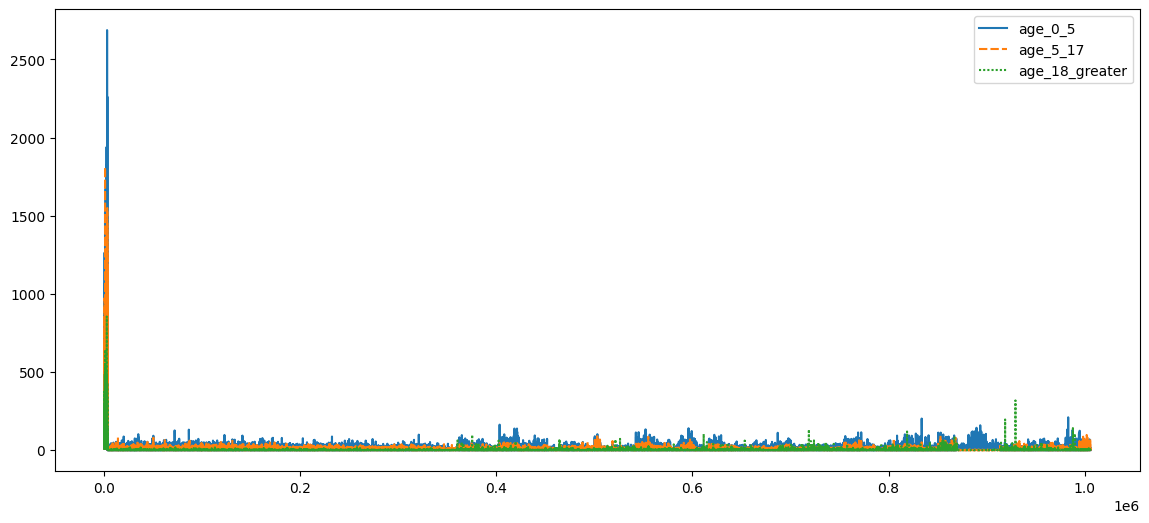

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df[['age_0_5','age_5_17','age_18_greater']])
plt.show()

<Axes: >

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


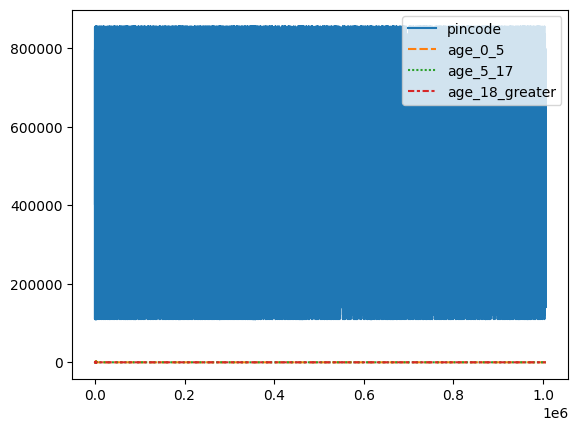

In [ ]:
sns.lineplot(data=df)

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values(by='date')

In [ ]:
df.to_csv('Enrollment_Data.csv', index=False)
files.download('Enrollment_Data.csv')